# Ortam Hazırlama

In [37]:
#Veri setimizin yer alan kutuphaneyi yükleyelim
%pip install ucimlrepo

In [38]:
#Gereken kutuphaneleri ekleyelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import roc_curve, auc

#1.Veri Seti Yükleme


In [39]:
 # Veri Setimizi ekleyelim
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# metadata
print(phishing_websites.metadata)

# Değişkenler Bilgileri
print(phishing_websites.variables)


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

**Veri Setimizde boşta değer yok ve değerleri {-1,0,1} oldukları için veri önişleme yapmamız gerekmiyor.**

# 2.Veri Setini Bölme

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3.Model Oluşturma

## Knn Algoritması


### Model egitimi ve tahmin

In [41]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train)
y_pred_3 = knn_3.predict(X_test)
y_proba_3 = knn_3.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [42]:
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X_train, y_train)
y_pred_4 = knn_4.predict(X_test)
y_proba_4 = knn_4.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [43]:
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
y_pred_5 = knn_5.predict(X_test)
y_proba_5 = knn_5.predict_proba(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
knn_6 = KNeighborsClassifier(n_neighbors=6)
knn_6.fit(X_train, y_train)
y_pred_6 = knn_6.predict(X_test)
y_proba_6 = knn_6.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [45]:
knn_7 = KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train, y_train)
y_pred_7 = knn_7.predict(X_test)
y_proba_7 = knn_7.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
knn_8 = KNeighborsClassifier(n_neighbors=8)
knn_8.fit(X_train, y_train)
y_pred_8 = knn_8.predict(X_test)
y_proba_8 = knn_8.predict_proba(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [47]:
knn_9 = KNeighborsClassifier(n_neighbors=9)
knn_9.fit(X_train, y_train)
y_pred_9 = knn_9.predict(X_test)
y_proba_9 = knn_9.predict_proba(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


### Değerlendirme

In [48]:
print("Confusion Matrix for n_neighbors=3:")
print(confusion_matrix(y_test, y_pred_3))
print(classification_report(y_test, y_pred_3,digits=4))

print("Confusion Matrix for n_neighbors=4:")
print(confusion_matrix(y_test, y_pred_4))
print(classification_report(y_test, y_pred_4,digits=4))

print("Confusion Matrix for n_neighbors=5:")
print(confusion_matrix(y_test, y_pred_5))
print(classification_report(y_test, y_pred_5,digits=4))

print("Confusion Matrix for n_neighbors=6:")
print(confusion_matrix(y_test, y_pred_6))
print(classification_report(y_test, y_pred_6,digits=4))

print("Confusion Matrix for n_neighbors=7:")
print(confusion_matrix(y_test, y_pred_7))
print(classification_report(y_test, y_pred_7,digits=4))

print("Confusion Matrix for n_neighbors=8:")
print(confusion_matrix(y_test, y_pred_8))
print(classification_report(y_test, y_pred_8,digits=4))

print("Confusion Matrix for n_neighbors=9:")
print(confusion_matrix(y_test, y_pred_9))
print(classification_report(y_test, y_pred_9,digits=4))

Confusion Matrix for n_neighbors=3:
[[1327  101]
 [  87 1802]]
              precision    recall  f1-score   support

          -1     0.9385    0.9293    0.9338      1428
           1     0.9469    0.9539    0.9504      1889

    accuracy                         0.9433      3317
   macro avg     0.9427    0.9416    0.9421      3317
weighted avg     0.9433    0.9433    0.9433      3317

Confusion Matrix for n_neighbors=4:
[[1351   77]
 [ 152 1737]]
              precision    recall  f1-score   support

          -1     0.8989    0.9461    0.9219      1428
           1     0.9576    0.9195    0.9382      1889

    accuracy                         0.9310      3317
   macro avg     0.9282    0.9328    0.9300      3317
weighted avg     0.9323    0.9310    0.9311      3317

Confusion Matrix for n_neighbors=5:
[[1315  113]
 [ 101 1788]]
              precision    recall  f1-score   support

          -1     0.9287    0.9209    0.9248      1428
           1     0.9406    0.9465    0.9435     

Knn algoritmasında neighbour(komşu) sayısının 3 seçilmiş olması karar ağacı

modelinden daha doğru sonuçlar verilmesini sağladı.

## Karar Agaçları


In [ ]:
#Karar agacı olusturuldu.
#Algoritma olarak gini kullanıldı ve derinik 10 ayarlandı.
#hem tahmin sonuclar ve dogruluklar hesaplandı
#hem de karar ağacının şeması
tree_model=DecisionTreeClassifier(criterion="gini",max_depth=10)
tree_model.fit(X_train,y_train)
y_treepred=tree_model.predict(X_test)
y_pred_karar_proba=tree_model.predict_proba(X_test)
print(confusion_matrix(y_test, y_treepred))
print(classification_report(y_test, y_treepred,digits=4))
plt.figure(figsize=(12,8))
plot_tree(tree_model,filled=True,feature_names=phishing_websites.feature_names,class_names=phishing_websites.target_names)
plt.show()

[[1343   85]
 [ 100 1789]]
              precision    recall  f1-score   support

          -1     0.9307    0.9405    0.9356      1428
           1     0.9546    0.9471    0.9508      1889

    accuracy                         0.9442      3317
   macro avg     0.9427    0.9438    0.9432      3317
weighted avg     0.9443    0.9442    0.9443      3317



[[1348   80]
 [  66 1823]]
              precision    recall  f1-score   support

          -1     0.9533    0.9440    0.9486      1428
           1     0.9580    0.9651    0.9615      1889

    accuracy                         0.9560      3317
   macro avg     0.9556    0.9545    0.9551      3317
weighted avg     0.9560    0.9560    0.9560      3317



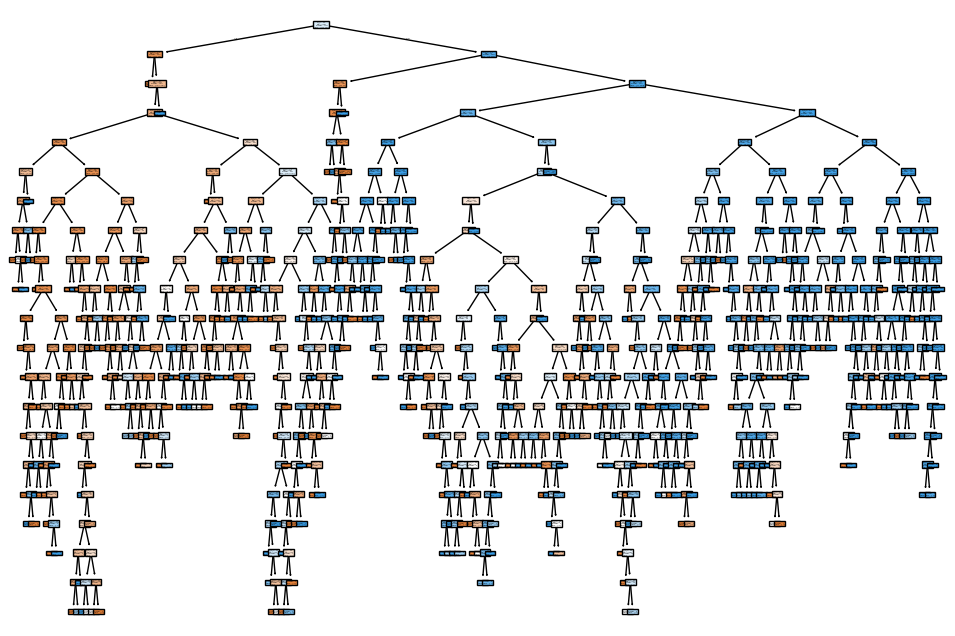

In [15]:
#derinlik 20 yapıldı daha ıyı sonuc verdıgı goruldu.
tree_model2=DecisionTreeClassifier(criterion="gini",max_depth=20)
tree_model2.fit(X_train,y_train)
y_treepred2=tree_model2.predict(X_test)
y_pred_karar_proba2=tree_model2.predict_proba(X_test)
print(confusion_matrix(y_test, y_treepred2))
print(classification_report(y_test, y_treepred2,digits=4))
plt.figure(figsize=(12,8))
plot_tree(tree_model2,filled=True,feature_names=phishing_websites.feature_names,class_names=phishing_websites.target_names)
plt.show()

[[1352   76]
 [  61 1828]]
              precision    recall  f1-score   support

          -1     0.9568    0.9468    0.9518      1428
           1     0.9601    0.9677    0.9639      1889

    accuracy                         0.9587      3317
   macro avg     0.9585    0.9572    0.9578      3317
weighted avg     0.9587    0.9587    0.9587      3317



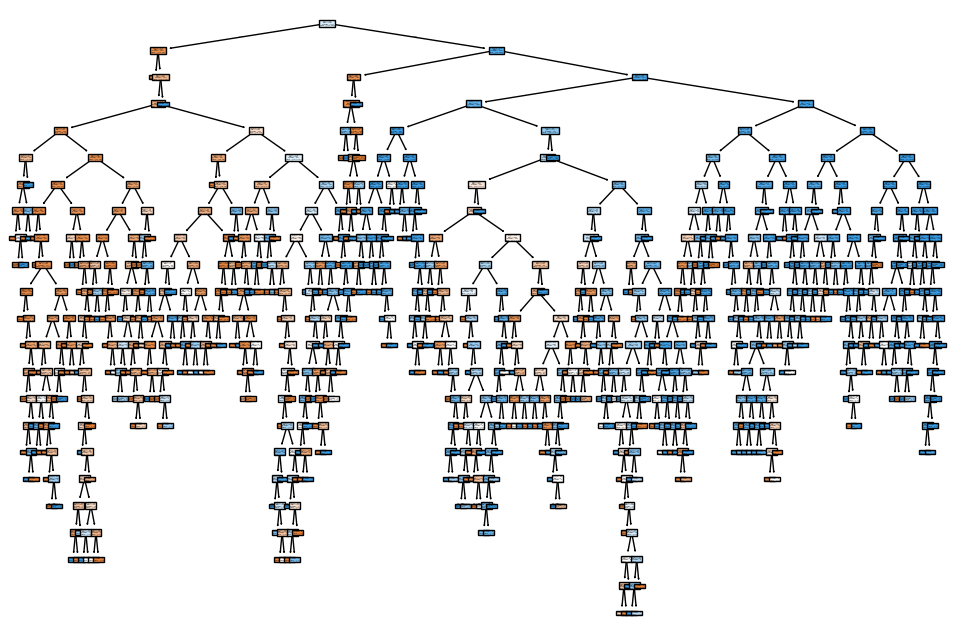

In [16]:
# en dogru sonucu derınlık 30 olunca verıyor.
tree_model3=DecisionTreeClassifier(criterion="gini",max_depth=30)
tree_model3.fit(X_train,y_train)
y_treepred3=tree_model3.predict(X_test)
y_pred_karar_proba3=tree_model3.predict_proba(X_test)
print(confusion_matrix(y_test, y_treepred3))
print(classification_report(y_test, y_treepred3,digits=4))
plt.figure(figsize=(12,8))
plot_tree(tree_model3,filled=True,feature_names=phishing_websites.feature_names,class_names=phishing_websites.target_names)
plt.show()

In [17]:
#derinlik 40 olunca derinlik 30'ken elde ettiğimiz sonuca çok yakın değer elde ediyoruz
tree_model4=DecisionTreeClassifier(criterion="gini",max_depth=40)
tree_model4.fit(X_train,y_train)
y_treepred4=tree_model4.predict(X_test)
y_pred_karar_proba4=tree_model4.predict_proba(X_test)
print(confusion_matrix(y_test, y_treepred4))
print(classification_report(y_test, y_treepred4,digits=4))

[[1355   73]
 [  68 1821]]
              precision    recall  f1-score   support

          -1     0.9522    0.9489    0.9505      1428
           1     0.9615    0.9640    0.9627      1889

    accuracy                         0.9575      3317
   macro avg     0.9568    0.9564    0.9566      3317
weighted avg     0.9575    0.9575    0.9575      3317



## SVM (Support Vector Machine)

In [18]:
X_svm = phishing_websites.data.features
y_svm = phishing_websites.data.targets
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size = 0.3, random_state = 42)

model_lin = SVC(kernel = 'linear', C=1.0, probability=True)
model_lin.fit(X_svm_train, y_svm_train)
y_score_svm_lin = model_lin.predict_proba(X_svm_test)[:,1]

model_rbf = SVC(kernel = 'rbf', C=1.0, gamma = 0.1, probability=True)
model_rbf.fit(X_svm_train, y_svm_train)
y_score_svm_rbf = model_rbf.predict_proba(X_svm_test)[:,1]

y_pred_svm_rbf = model_rbf.predict(X_svm_test)
y_pred_svm_lin = model_lin.predict(X_svm_test)

print("\nLineer SVM: Verilerin Dogrusal ayrilmasi\n")
print(confusion_matrix(y_svm_test, y_pred_svm_lin))
print(classification_report(y_svm_test, y_pred_svm_lin,digits=4))
print("\nRBF SVM\n")
print(confusion_matrix(y_svm_test, y_pred_svm_rbf))
print(classification_report(y_svm_test, y_pred_svm_rbf,digits=4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Lineer SVM: Verilerin Dogrusal ayrilmasi

[[1289  139]
 [ 113 1776]]
              precision    recall  f1-score   support

          -1     0.9194    0.9027    0.9110      1428
           1     0.9274    0.9402    0.9338      1889

    accuracy                         0.9240      3317
   macro avg     0.9234    0.9214    0.9224      3317
weighted avg     0.9240    0.9240    0.9239      3317


RBF SVM

[[1333   95]
 [  63 1826]]
              precision    recall  f1-score   support

          -1     0.9549    0.9335    0.9441      1428
           1     0.9505    0.9666    0.9585      1889

    accuracy                         0.9524      3317
   macro avg     0.9527    0.9501    0.9513      3317
weighted avg     0.9524    0.9524    0.9523      3317



In [19]:
#Dogruluk degerini artirmak icin C ve gamma degerlerini degistirelim
model_lin1 = SVC(kernel = 'linear', C=100, probability=True)
model_lin1.fit(X_svm_train, y_svm_train)

model_rbf1 = SVC(kernel = 'rbf', C=10, gamma = 0.01, probability=True)
model_rbf1.fit(X_svm_train, y_svm_train)

y_pred_svm_rbf1 = model_rbf1.predict(X_svm_test)
y_pred_svm_lin1 = model_lin1.predict(X_svm_test)

print("Lineer SVM: Verilerin Dogrusal ayrilmasi\n")
print(confusion_matrix(y_svm_test, y_pred_svm_lin1))
print(classification_report(y_svm_test, y_pred_svm_lin1))
print("\nRBF SVM\n")
print(confusion_matrix(y_svm_test, y_pred_svm_rbf1))
print(classification_report(y_svm_test, y_pred_svm_rbf1))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lineer SVM: Verilerin Dogrusal ayrilmasi

[[1290  138]
 [ 113 1776]]
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1428
           1       0.93      0.94      0.93      1889

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317


RBF SVM

[[1312  116]
 [  88 1801]]
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93      1428
           1       0.94      0.95      0.95      1889

    accuracy                           0.94      3317
   macro avg       0.94      0.94      0.94      3317
weighted avg       0.94      0.94      0.94      3317



In [20]:
#Dogruluk degerini degistirmek icin C ve gamma degerlerini degistirelim
model_lin2 = SVC(kernel = 'linear', C=10)
model_lin2.fit(X_svm_train, y_svm_train)

model_rbf2 = SVC(kernel = 'rbf', C=100, gamma = 0.01)
model_rbf2.fit(X_svm_train, y_svm_train)

y_pred_svm_rbf2 = model_rbf2.predict(X_svm_test)
y_pred_svm_lin2 = model_lin2.predict(X_svm_test)

print("Lineer SVM: Verilerin Dogrusal ayrilmasi\n")
print(confusion_matrix(y_svm_test, y_pred_svm_lin2))
print(classification_report(y_svm_test, y_pred_svm_lin2, digits=4))
print("\nRBF SVM\n")
print(confusion_matrix(y_svm_test, y_pred_svm_rbf2))
print(classification_report(y_svm_test, y_pred_svm_rbf2, digits = 4))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lineer SVM: Verilerin Dogrusal ayrilmasi

[[1290  138]
 [ 113 1776]]
              precision    recall  f1-score   support

          -1     0.9195    0.9034    0.9113      1428
           1     0.9279    0.9402    0.9340      1889

    accuracy                         0.9243      3317
   macro avg     0.9237    0.9218    0.9227      3317
weighted avg     0.9243    0.9243    0.9242      3317


RBF SVM

[[1346   82]
 [  69 1820]]
              precision    recall  f1-score   support

          -1     0.9512    0.9426    0.9469      1428
           1     0.9569    0.9635    0.9602      1889

    accuracy                         0.9545      3317
   macro avg     0.9541    0.9530    0.9535      3317
weighted avg     0.9545    0.9545    0.9545      3317



Sonuc olarak lineer cekirdek tipi icin C degerinin degismesi dogruluk degerini etkilemiyor. Ayni zamanda rbf(lineer olmayan) cekirdek tipi icin en buyuk dogruluk C=10 ve gamma=0.1 degerleri icin en buyuk olarak hesaplaniyor.

##Random Forest

In [21]:
#Model Random Forest ile eğitildi.
#Sonuçların diğer yöntemlere göre daha doğru sonuç verdiği görüldü.
# Hiperparametre aralığı belirleniyor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None]
}

# Model nesnesi
rd = RandomForestClassifier(random_state=42)

# GridSearchCV kurulumu
grid_search = GridSearchCV(
    estimator=rd,
    param_grid=param_grid,
    cv=5,                  # 5 katlı cross-validation
    scoring='f1',          # F1 skoruna göre en iyi modeli bul
    n_jobs=-1,             # Tüm CPU çekirdeklerini kullan
    verbose=1              # Arama süreci hakkında bilgi ver
)

# Model eğitimi (GridSearchCV ile)
grid_search.fit(X_train, y_train)

# En iyi parametrelerle eğitilmiş model
best_model = grid_search.best_estimator_

# Tahminler
y_rfpred = best_model.predict(X_test)
y_proba_rf = best_model.predict_proba(X_test)

# Değerlendirme
print("En iyi parametreler:", grid_search.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_rfpred))

print("\nClassification Report:")
print(classification_report(y_test, y_rfpred, digits=4))



Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


En iyi parametreler: {'max_depth': None, 'n_estimators': 150}

Confusion Matrix:
[[1356   72]
 [  37 1852]]

Classification Report:
              precision    recall  f1-score   support

          -1     0.9734    0.9496    0.9614      1428
           1     0.9626    0.9804    0.9714      1889

    accuracy                         0.9671      3317
   macro avg     0.9680    0.9650    0.9664      3317
weighted avg     0.9673    0.9671    0.9671      3317



## Naive Bayes

In [22]:
#Naive(Basit Bayes) Siniflandirma modeli
nbayes=GaussianNB()#modeli olustur
nbayes.fit(X_train,y_train)#modeli egit
y_pred_nbayes=nbayes.predict(X_test)#Tahmin yapıcak test kumesı ile
#Sonucları yazdırma.
y_pred_nbayes_proba=nbayes.predict_proba(X_test)
print("Naive Bayes Siniflandrirma")
print("Naive Bayes Doğruluk:", accuracy_score(y_test, y_pred_nbayes))
print("Classification Report:\n", classification_report(y_test, y_pred_nbayes,digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nbayes))


Naive Bayes Siniflandrirma
Naive Bayes Doğruluk: 0.589990955682846
Classification Report:
               precision    recall  f1-score   support

          -1     0.5122    0.9979    0.6770      1428
           1     0.9944    0.2816    0.4389      1889

    accuracy                         0.5900      3317
   macro avg     0.7533    0.6398    0.5580      3317
weighted avg     0.7868    0.5900    0.5414      3317

Confusion Matrix:
 [[1425    3]
 [1357  532]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Regresyon

MSE ort gerçek değerden sapmadır ve 0 a yaklaştıkça daha doğru sonuç verdiği anlaşılır.
r2 1 e yaklaştıkça daha doğrudur

In [23]:
#Lineer Regresyon modeli.

#Modelin olusturulmasi
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Tahminlerin yapilmasi
y_pred_linear = linear_model.predict(X_test)

#Metriklerin hesaplanmasi
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Lineer Regresyon")
print("MSE:", mse_linear)
print("R2:", r2_linear)

Lineer Regresyon
MSE: 0.29720497424071307
R2: 0.6969412272743785


In [24]:
# tahminleri 0 eşik değeriyle sınıfa dönüştürmesi
y_pred_linearClass = np.where(y_pred_linear >= 0, 1, -1)

print(classification_report(y_test, y_pred_linearClass,digits=4))

              precision    recall  f1-score   support

          -1     0.9202    0.8880    0.9038      1428
           1     0.9175    0.9418    0.9295      1889

    accuracy                         0.9186      3317
   macro avg     0.9188    0.9149    0.9166      3317
weighted avg     0.9186    0.9186    0.9184      3317



In [25]:
#Random Forest Regresyon modeli.

#Modelin olusturulmasi
random_forest_model=RandomForestRegressor(n_estimators=150,random_state=42)
random_forest_model.fit(X_train,y_train)

#Tahminlerin yapilmasi
y_pred_rfr=random_forest_model.predict(X_test)

#Metriklerin hesaplanmasi
mse_randfo=mean_squared_error(y_test,y_pred_rfr)
r2_randfo=r2_score(y_test,y_pred_rfr)

print("\nRandom Forest Regresyonu")
print("Mean Squared Error:",mse_randfo)
print("R2 Score:",r2_randfo)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest Regresyonu
Mean Squared Error: 0.09906442872530155
R2 Score: 0.8989843818497503


In [26]:
# tahminleri 0 eşik değeriyle sınıfa dönüştürmesi
y_pred_rfClass = np.where(y_pred_rfr >= 0, 1, -1)

print(classification_report(y_test, y_pred_rfClass,digits=4))

              precision    recall  f1-score   support

          -1     0.9714    0.9517    0.9614      1428
           1     0.9640    0.9788    0.9714      1889

    accuracy                         0.9671      3317
   macro avg     0.9677    0.9653    0.9664      3317
weighted avg     0.9672    0.9671    0.9671      3317



# 4.Grafikler

## Bar grafiği ile Doğruluk Karşılaştırılması


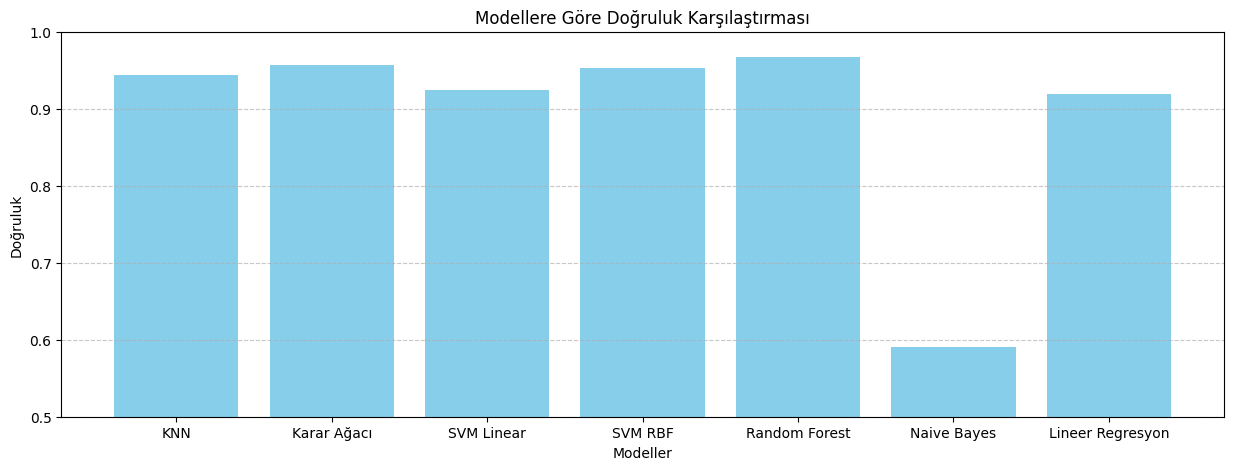

In [27]:
#Bar grafikleri icin gerekli olan listelerin olusturulmasi
model_names = ['KNN', 'Karar Ağacı', 'SVM Linear', 'SVM RBF', 'Random Forest','Naive Bayes','Lineer Regresyon']
accuracy_scores = [0.9433, 0.9572, 0.9240, 0.9524, 0.9671,0.59,0.9186]

#Bar grafiginin olusturulmasi
plt.figure(figsize=(15, 5))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.ylim(0.5, 1)
plt.title('Modellere Göre Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Bar grafiği ile MSE ve R² Karşılaştırılması

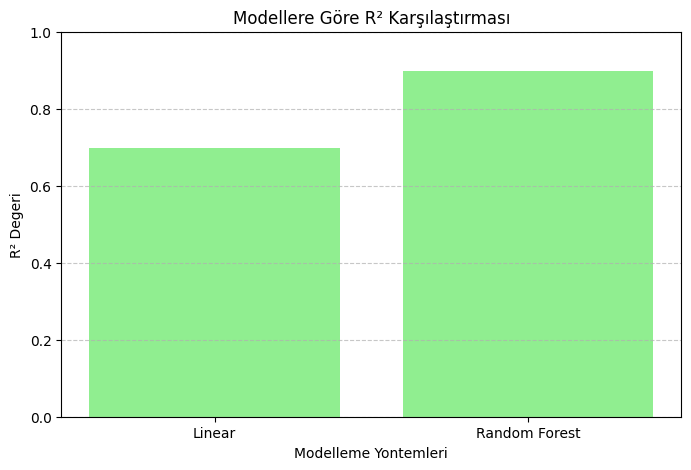

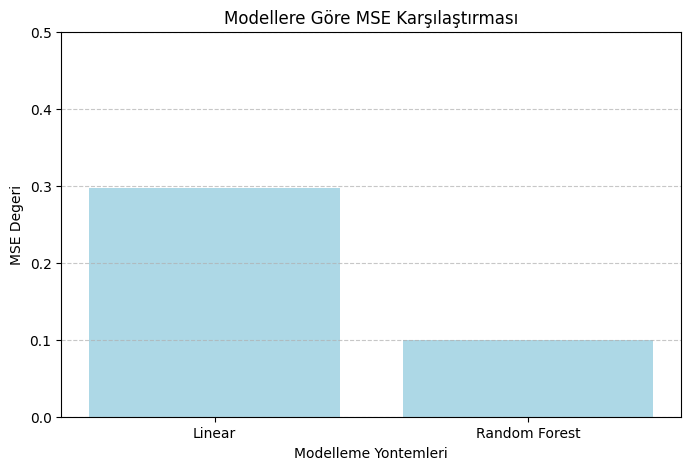

In [28]:
#Bar grafikleri icin gerekli olan listelerin olusturulmasi
models = ['Linear', 'Random Forest']
mse_scores = [mse_linear, mse_randfo]
r2_scores = [r2_linear, r2_randfo]

#Bar grafiklerinin olusturulmasi
#R²
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color='lightgreen')
plt.title("Modellere Göre R² Karşılaştırması")
plt.xlabel("Modelleme Yontemleri")
plt.ylabel("R² Degeri")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#MSE
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color='lightblue')
plt.ylim(0, 0.5)
plt.title('Modellere Göre MSE Karşılaştırması')
plt.xlabel('Modelleme Yontemleri')
plt.ylabel('MSE Degeri')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ROC Egrileri

###-KNN ROC EGRİSİ


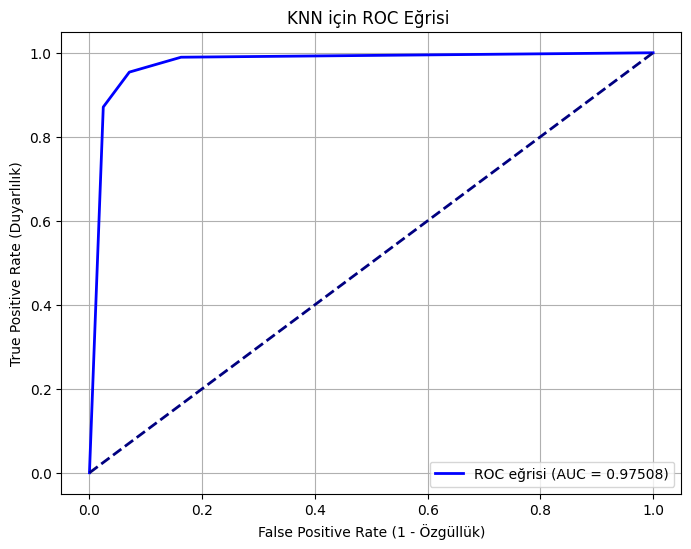

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_3[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC eğrisi (AUC = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # rastgele tahmin çizgisi
plt.xlabel('False Positive Rate (1 - Özgüllük)')
plt.ylabel('True Positive Rate (Duyarlılık)')
plt.title('KNN için ROC Eğrisi ')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-RandomForest Roc egrisi

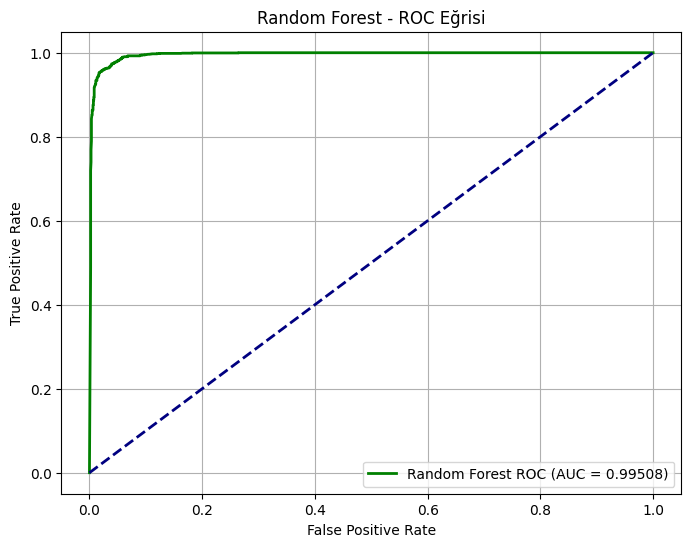

In [30]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC (AUC = %0.5f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-Bayes Roc Egrisi

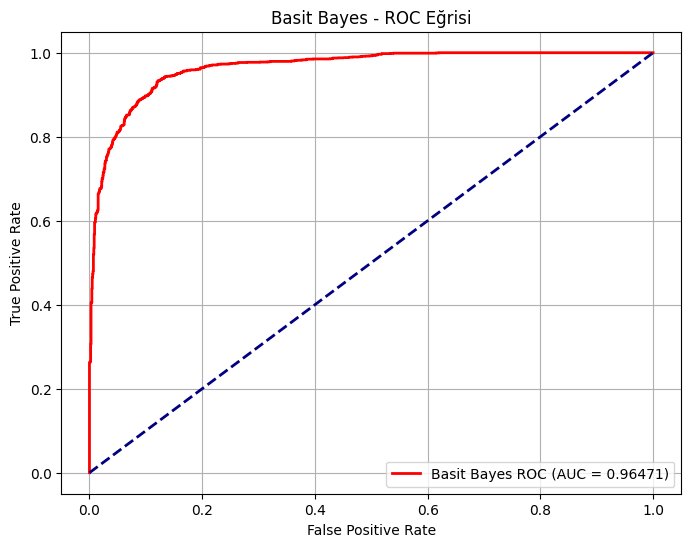

In [31]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nbayes_proba[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Basit Bayes ROC (AUC = %0.5f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basit Bayes - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-SVM(support vector machine) Linear

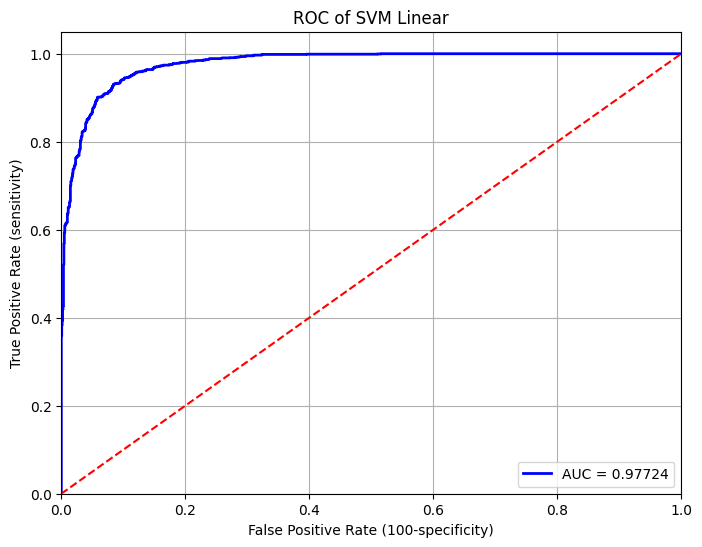

In [32]:
fpr_svm_lin, tpr_svm_lin, _ = roc_curve(y_svm_test, y_score_svm_lin)
roc_auc_svm_lin = auc(fpr_svm_lin, tpr_svm_lin)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm_lin, tpr_svm_lin, color='blue', lw=2, label='AUC = %0.5f' % roc_auc_svm_lin)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (100-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC of SVM Linear')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


###-SVM(support vector machine) RBF

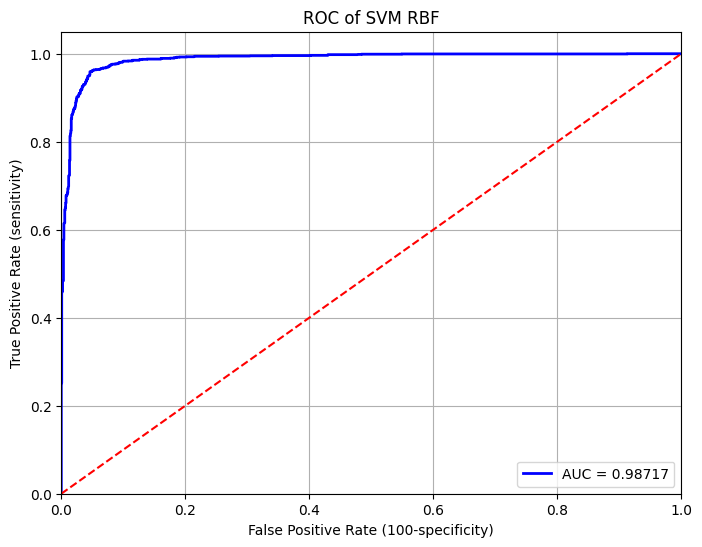

In [33]:
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_svm_test, y_score_svm_rbf)
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='blue', lw=2, label='AUC = %0.5f' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (100-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC of SVM RBF')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-Karar Agaci

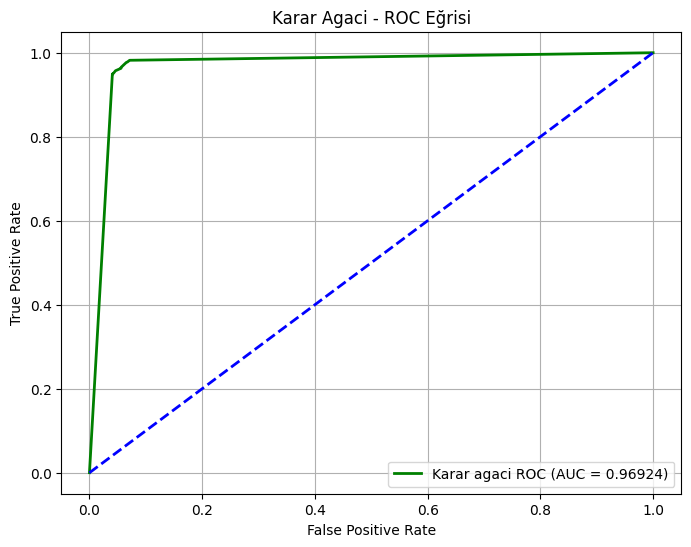

In [34]:
fpr_ka, tpr_ka, _ = roc_curve(y_test, y_pred_karar_proba2[:, 1])
roc_auc_ka = auc(fpr_ka, tpr_ka)
plt.figure(figsize=(8, 6))
plt.plot(fpr_ka, tpr_ka, color='green', lw=2, label='Karar agaci ROC (AUC = %0.5f)' % roc_auc_ka)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Karar Agaci - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### -Regresyon

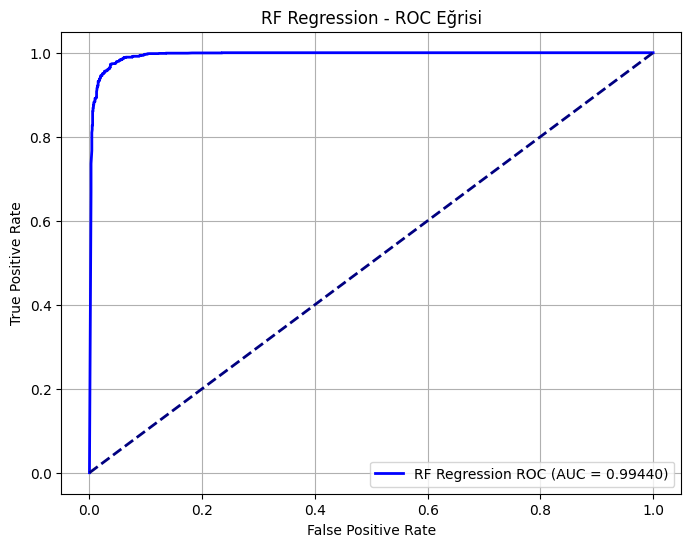

In [35]:
fpr_rfr, tpr_rfr, _ = roc_curve(y_test, y_pred_rfr)
roc_auc_rfr = auc(fpr_rfr, tpr_rfr)

# Grafik çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfr, tpr_rfr, color='blue', lw=2, label='RF Regression ROC (AUC = %0.5f)' % roc_auc_rfr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF Regression - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

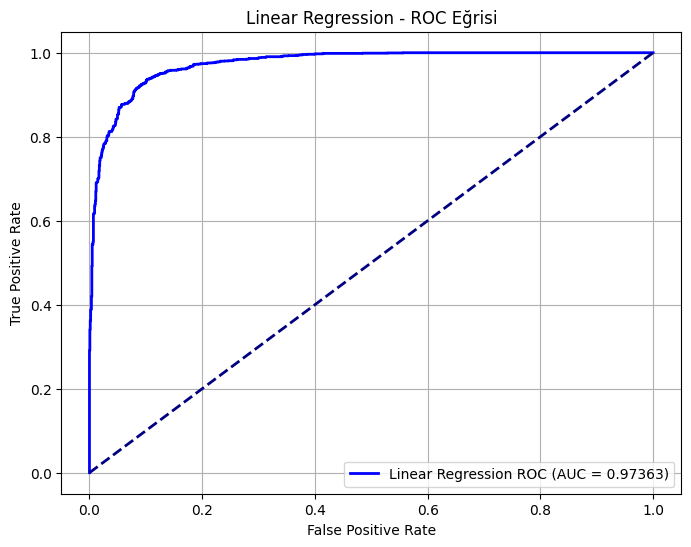

In [36]:
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_pred_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

# Grafik çizimi
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label='Linear Regression ROC (AUC = %0.5f)' % roc_auc_linear)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear Regression - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()